In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 120
import os
import sys
sys.path.insert(0, "../src")
from cut_predictor import DoubleProjectionPredictor

In [3]:
doe_single = pd.read_csv('../data/doe.csv')
doe_single

,doe_id,Material_ID,Blechdicke,Niederhalterkraft,Ziehspalt,Stempel_ID,Einlegeposition,Ziehtiefe,Breite,UG,OG,E,Material_Name,Rp0,Rp0.2,Rp100,Rp25,Rp50
0,1,3,1.01,410,2.4,3,-5,30,70.2,1.71,2.00,191.37245,DC04_1.00mm,138.226960,147.601859,534.002871,377.443009,449.528189
1,2,5,1.48,400,2.4,3,-4,50,70.2,1.71,2.00,71.68198,AA5083_1.50mm,235.160326,237.951493,384.123147,369.820589,383.041834
2,3,1,1.00,210,2.4,3,-1,70,70.2,1.71,2.00,164.62254,DC01_1.00mm,133.182632,147.101263,517.275855,385.773439,447.384736
3,4,2,1.19,390,2.4,3,5,30,70.2,1.71,2.00,200.03813,DC01_1.20mm,160.714935,174.535075,564.455438,424.931018,490.442223
4,5,1,1.00,360,1.6,2,3,30,71.8,1.14,1.33,164.62254,DC01_1.00mm,133.182632,147.101263,517.275855,385.773439,447.384736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,3,1.01,90,1.6,2,0,70,71.8,1.14,1.33,191.37245,DC04_1.00mm,138.226960,147.601859,534.002871,377.443009,449.528189
996,997,4,0.99,480,2.4,3,5,30,70.2,1.71,2.00,71.94184,AA5083_1.00mm,248.796491,251.315902,385.373316,371.774337,384.299873
997,998,5,1.48,490,2.4,3,3,50,70.2,1.71,2.00,71.68198,AA5083_1.50mm,235.160326,237.951493,384.123147,369.820589,383.041834
998,999,5,1.48,120,2.4,3,-3,30,70.2,1.71,2.00,71.68198,AA5083_1.50mm,235.160326,237.951493,384.123147,369.820589,383.041834


In [4]:
doe_joining = pd.read_csv('../data/doe_joining.csv')
doe_joining

,doe_id,Oberblech_ID,Unterblech_ID,Spanner_1,Spanner_2,Spanner_3,Spanner_4,Oberblech_MID,Unterblech_MID,Success,Oberblech_zt,Unterblech_zt,Oberblech_t,Unterblech_t
0,1,2,1,-3,-5,-5,3,5,3,1,50,30,1.48,1.01
1,2,6,4,-3,2,2,-2,4,2,1,50,30,0.99,1.19
2,3,12,5,-3,2,-4,1,1,1,1,50,30,1.00,1.00
3,4,13,7,3,3,4,5,3,4,1,50,30,1.01,0.99
4,5,19,9,5,-5,1,-3,3,6,1,50,30,1.01,1.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,981,990,-3,-4,2,-1,5,6,1,70,30,1.48,1.01
496,497,986,993,2,5,-2,-3,4,5,0,70,30,0.99,1.48
497,498,992,994,-1,-1,-4,4,6,5,0,70,30,1.01,1.48
498,499,996,997,3,0,-1,-3,3,4,0,70,30,1.01,0.99


In [6]:
data = pd.read_csv('../data/joining.csv')
data

,doe_id,u,v,pos,x,y,z,thickness,epseqpl,thinning
0,1,0.000000,0.000000,1,-124.976913,-119.789223,-10.933162,1.500506,0.000000,1.013855
1,1,1.000000,0.008265,1,128.847961,-110.392357,-19.564697,1.500526,0.000000,1.013869
2,1,0.500000,0.501202,1,-0.117754,1.766519,33.259033,1.497741,0.000605,1.011987
3,1,0.500000,0.541457,1,-0.176490,17.830286,32.576855,1.495413,0.001760,1.010414
4,1,1.000000,0.270177,1,151.037659,-60.162697,6.698619,1.422338,0.336137,0.961039
...,...,...,...,...,...,...,...,...,...,...
14754118,487,0.248585,0.563621,0,-87.781647,18.459038,-46.403336,1.490891,0.020119,1.007359
14754119,487,0.237705,0.577821,0,-92.530228,23.965593,-45.939186,1.478159,0.083724,0.998756
14754120,487,0.247812,0.543246,0,-87.685509,11.618693,-47.742691,1.403345,0.077909,0.948206
14754121,487,0.244286,0.573259,0,-89.899788,22.363468,-46.155094,1.487671,0.023589,1.005183


In [7]:
reg = DoubleProjectionPredictor()

reg.load_data(
    doe_joining=doe_joining, 
    doe_single=doe_single, 
    data=data, 
    process_parameters_joining = [
        'Spanner_1',
        'Spanner_2',
        'Spanner_3',
        'Spanner_4',
        'Oberblech_MID',
        'Unterblech_MID',
    ], 
    process_parameters_single = [
        'Blechdicke', 
        'Niederhalterkraft', 
        'Ziehspalt', 
        'Einlegeposition', 
        'Ziehtiefe',
        'Rp0',
    ], 
    position = ['u', 'v'], 
    output = ['x', 'y', 'z'], 
    categorical_joining=[
    ], 
    categorical_single= [
        'Ziehspalt', 
        'Ziehtiefe',
    ], 
    index_joining='doe_id', 
    index_single='doe_id', 
    part_index='pos', 
    top_bottom=['Oberblech_ID', 'Unterblech_ID'],
    validation_split=0.1, 
    validation_method="random"

)
reg.save_config("../models/joining.pkl")
reg.data_summary()

Data summary
------------------------------------------------------------

Joining process parameters:
	- Spanner_1 : numerical [ -5  ...  5 ]
	- Spanner_2 : numerical [ -5  ...  5 ]
	- Spanner_3 : numerical [ -5  ...  5 ]
	- Spanner_4 : numerical [ -5  ...  5 ]
	- Oberblech_MID : numerical [ 1  ...  6 ]
	- Unterblech_MID : numerical [ 1  ...  6 ]
Single process parameters:
	- Blechdicke : numerical [ 0.99  ...  1.48 ]
	- Niederhalterkraft : numerical [ 10  ...  500 ]
	- Ziehspalt : categorical [1.6, 2.4]
	- Einlegeposition : numerical [ -5  ...  5 ]
	- Ziehtiefe : categorical [30, 50, 70]
	- Rp0 : numerical [ 133.18263199999998  ...  296.5565 ]
Input variables:
	- u : numerical, [ 0.0 / 1.0 ] 
	- v : numerical, [ 0.0 / 1.0 ] 
Output variable(s):
	- x : numerical, [ -203.5688019 / 203.2945709 ]
	- y : numerical, [ -122.5980301 / 99.30913544 ]
	- z : numerical, [ -50.89810181 / 57.64501572 ]

Inputs (14754123, 24)
Outputs (14754123, 3)
Total number of experiments: 321
Total number of sa

In [8]:
config = {
    'batch_size': 2048*16,
    'max_epochs': 50,
    'layers': [256, 256, 256, 256, 256],
    'dropout': 0.0,
    'learning_rate': 0.001,
    'activation': 'lrelu'
}

#reg.custom_model(save_path='../models/best_joining_model', config=config, verbose=True)
#reg.training_summary()

In [10]:
reg.load_network('../models/best_joining_xyz_model')

Doe_ID 367
12/12 [==============================] - 0s 14ms/step


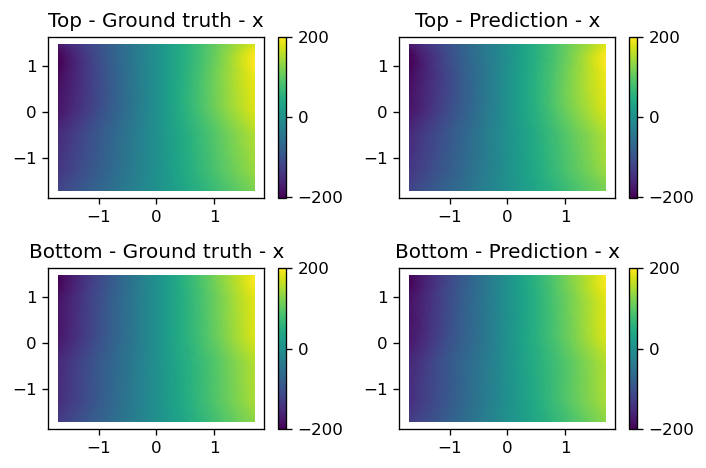

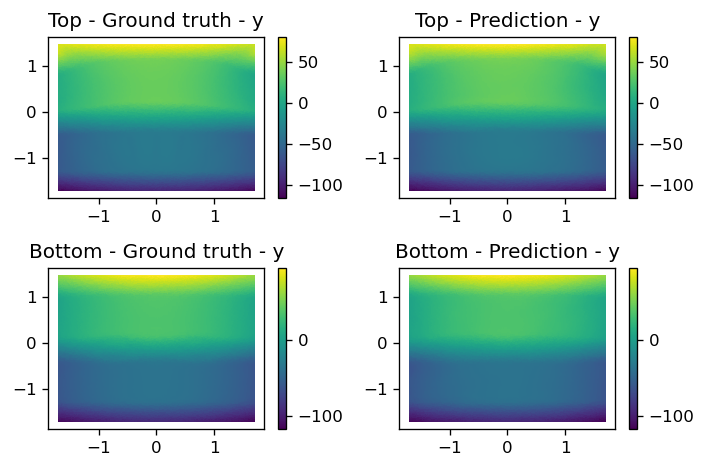

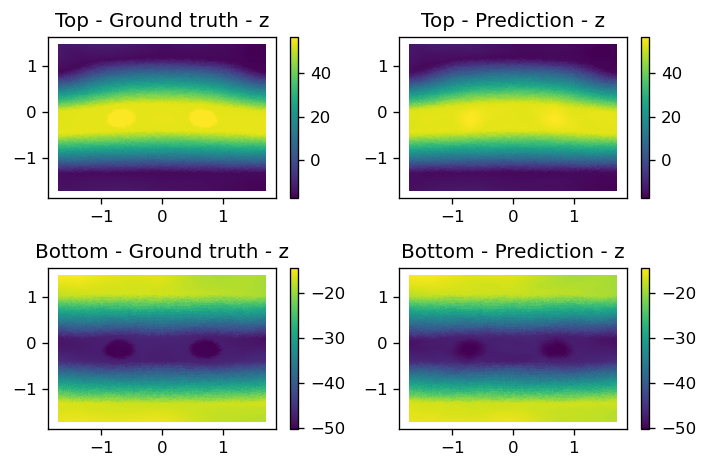

In [11]:
idx = np.random.choice(data['doe_id'].unique()) 
print("Doe_ID", idx)
reg.compare(idx)

Doe_ID 157
12/12 [==============================] - 0s 16ms/step


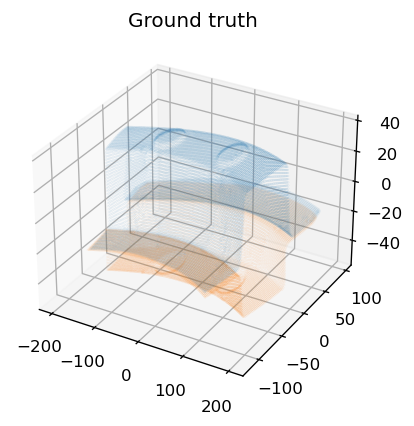

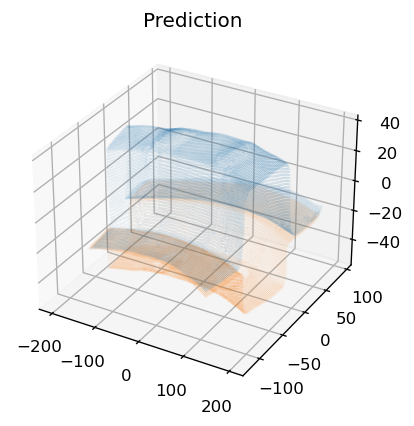

In [12]:
idx = np.random.choice(data['doe_id'].unique()) 
print("Doe_ID", idx)
reg.compare_xyz(idx)

In [13]:
reg.save_h5("/tmp/joining_xyz.h5")

In [18]:
self = reg
doe_id = 1
indices = self.df_raw[self.df_raw[self.doe_id_joining]==doe_id].index.to_numpy()
indices

array([    0,     1,     2, ..., 45053, 45054, 45055])

In [20]:
X = self.X[indices, :]
X.shape

(45056, 24)

In [21]:
self.process_parameters

['Spanner_1',
 'Spanner_2',
 'Spanner_3',
 'Spanner_4',
 'Oberblech_MID',
 'Unterblech_MID',
 'Blechdicke',
 'Niederhalterkraft',
 'Ziehspalt',
 'Einlegeposition',
 'Ziehtiefe',
 'Rp0']

In [29]:
process_parameters = {'Spanner_1':0.,
 'Spanner_2':0.,
 'Spanner_3':0.,
 'Spanner_4':0.,
 'Oberblech_MID':1,
 'Unterblech_MID':2,
 'Blechdicke':1.2,
 'Niederhalterkraft':300,
 'Ziehspalt':2.4,
 'Einlegeposition':0.,
 'Ziehtiefe':30.,
 'Rp0':200,}

In [30]:
reg.predict(process_parameters, (10,10))

InvalidArgumentError: Graph execution error:

Detected at node 'sequential/leaky_re_lu/LeakyRelu' defined at (most recent call last):
    File "/home/ingolf.lepenies/anaconda39/envs/sfem39/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/home/ingolf.lepenies/anaconda39/envs/sfem39/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/home/ingolf.lepenies/anaconda39/envs/sfem39/lib/python3.9/site-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/home/ingolf.lepenies/anaconda39/envs/sfem39/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/home/ingolf.lepenies/anaconda39/envs/sfem39/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/home/ingolf.lepenies/anaconda39/envs/sfem39/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/home/ingolf.lepenies/anaconda39/envs/sfem39/lib/python3.9/asyncio/base_events.py", line 596, in run_forever
      self._run_once()
    File "/home/ingolf.lepenies/anaconda39/envs/sfem39/lib/python3.9/asyncio/base_events.py", line 1890, in _run_once
      handle._run()
    File "/home/ingolf.lepenies/anaconda39/envs/sfem39/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/home/ingolf.lepenies/anaconda39/envs/sfem39/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 471, in dispatch_queue
      await self.process_one()
    File "/home/ingolf.lepenies/anaconda39/envs/sfem39/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 460, in process_one
      await dispatch(*args)
    File "/home/ingolf.lepenies/anaconda39/envs/sfem39/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 367, in dispatch_shell
      await result
    File "/home/ingolf.lepenies/anaconda39/envs/sfem39/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 662, in execute_request
      reply_content = await reply_content
    File "/home/ingolf.lepenies/anaconda39/envs/sfem39/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 360, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/home/ingolf.lepenies/anaconda39/envs/sfem39/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/ingolf.lepenies/anaconda39/envs/sfem39/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2880, in run_cell
      result = self._run_cell(
    File "/home/ingolf.lepenies/anaconda39/envs/sfem39/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2935, in _run_cell
      return runner(coro)
    File "/home/ingolf.lepenies/anaconda39/envs/sfem39/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/ingolf.lepenies/anaconda39/envs/sfem39/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3134, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/ingolf.lepenies/anaconda39/envs/sfem39/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3337, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/ingolf.lepenies/anaconda39/envs/sfem39/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3397, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_256933/2872529212.py", line 1, in <cell line: 1>
      reg.predict(process_parameters, (10,10))
    File "../src/cut_predictor/DoubleRegressor2D.py", line 313, in predict
      y = self.model.predict(X, batch_size=self.batch_size).reshape((nb_points, len(self.output_attributes)))
    File "/home/ingolf.lepenies/anaconda39/envs/sfem39/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/ingolf.lepenies/anaconda39/envs/sfem39/lib/python3.9/site-packages/keras/engine/training.py", line 2033, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "/home/ingolf.lepenies/anaconda39/envs/sfem39/lib/python3.9/site-packages/keras/engine/training.py", line 1845, in predict_function
      return step_function(self, iterator)
    File "/home/ingolf.lepenies/anaconda39/envs/sfem39/lib/python3.9/site-packages/keras/engine/training.py", line 1834, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/ingolf.lepenies/anaconda39/envs/sfem39/lib/python3.9/site-packages/keras/engine/training.py", line 1823, in run_step
      outputs = model.predict_step(data)
    File "/home/ingolf.lepenies/anaconda39/envs/sfem39/lib/python3.9/site-packages/keras/engine/training.py", line 1791, in predict_step
      return self(x, training=False)
    File "/home/ingolf.lepenies/anaconda39/envs/sfem39/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/ingolf.lepenies/anaconda39/envs/sfem39/lib/python3.9/site-packages/keras/engine/training.py", line 490, in __call__
      return super().__call__(*args, **kwargs)
    File "/home/ingolf.lepenies/anaconda39/envs/sfem39/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/ingolf.lepenies/anaconda39/envs/sfem39/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/ingolf.lepenies/anaconda39/envs/sfem39/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/home/ingolf.lepenies/anaconda39/envs/sfem39/lib/python3.9/site-packages/keras/engine/sequential.py", line 374, in call
      return super(Sequential, self).call(inputs, training=training, mask=mask)
    File "/home/ingolf.lepenies/anaconda39/envs/sfem39/lib/python3.9/site-packages/keras/engine/functional.py", line 458, in call
      return self._run_internal_graph(
    File "/home/ingolf.lepenies/anaconda39/envs/sfem39/lib/python3.9/site-packages/keras/engine/functional.py", line 596, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/home/ingolf.lepenies/anaconda39/envs/sfem39/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/home/ingolf.lepenies/anaconda39/envs/sfem39/lib/python3.9/site-packages/keras/engine/base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/ingolf.lepenies/anaconda39/envs/sfem39/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/home/ingolf.lepenies/anaconda39/envs/sfem39/lib/python3.9/site-packages/keras/layers/activation/leaky_relu.py", line 70, in call
      return backend.relu(inputs, alpha=self.alpha)
    File "/home/ingolf.lepenies/anaconda39/envs/sfem39/lib/python3.9/site-packages/keras/backend.py", line 4975, in relu
      return tf.nn.leaky_relu(x, alpha=alpha)
Node: 'sequential/leaky_re_lu/LeakyRelu'
Matrix size-incompatible: In[0]: [100,17], In[1]: [24,256]
	 [[{{node sequential/leaky_re_lu/LeakyRelu}}]] [Op:__inference_predict_function_1833]

In [31]:
reg.min_values

{'Spanner_1': -5,
 'Spanner_2': -5,
 'Spanner_3': -5,
 'Spanner_4': -5,
 'Oberblech_MID': 1,
 'Unterblech_MID': 1,
 'Blechdicke': 0.99,
 'Niederhalterkraft': 10,
 'Einlegeposition': -5,
 'Rp0': 133.18263199999998,
 'u': 0.0,
 'v': 0.0,
 'x': -203.5688019,
 'y': -122.5980301,
 'z': -50.89810181}